In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import gmaps
# Google developer API key
from config import gkey
# Access maps with unique API key
gmaps.configure(api_key=gkey)

%matplotlib inline
sns.set_style("darkgrid")

In [6]:
# country codes conversion
country_csv = ("country_codes.csv")
country_df = pd.read_csv(country_csv)
country_df2 = country_df[["Alpha-2 code","Alpha-3 code"]].copy()
country_df3 = country_df2.rename(columns={'Alpha-3 code': 'NOC'}, inplace = False)
country_df3.head()

,Alpha-2 code,NOC
0,AF,AFG
1,AX,ALA
2,AL,ALB
3,DZ,DZA
4,AS,ASM


In [7]:
path = ("athlete_events.csv")
df_events = pd.read_csv(path)


#df_events["join_id"] = df_events["NOC"] + df_events["Year"].astype(str)
# summer_df = df_events[df_events['Season'] == 'Summer']
# summer_df["BMI"] = summer_df["Weight"]/((summer_df["Height"]/100)**2)
# Add numerical value for medals? 3 = gold, 2= silver, 1 bronze and no medal = 0
df_events_a = pd.merge(df_events, country_df3, on="NOC")
df_events_a['join_id'] = df_events_a["NOC"] + df_events_a["Year"].astype(str)
df_events_a.head(10)



,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Alpha-2 code,join_id
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,CN,CHN1992
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,CN,CHN2012
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,CN,CHN2000
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,CN,CHN2004
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,CN,CHN2016
5,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,NaN,CN,CHN2016
6,3605,An Weijiang,M,22.0,178.0,72.0,China,CHN,2006 Winter,2006,Winter,Torino,Speed Skating,Speed Skating Men's 500 metres,NaN,CN,CHN2006
7,3605,An Weijiang,M,22.0,178.0,72.0,China,CHN,2006 Winter,2006,Winter,Torino,Speed Skating,"Speed Skating Men's 1,000 metres",NaN,CN,CHN2006
8,3610,An Yulong,M,19.0,173.0,70.0,China,CHN,1998 Winter,1998,Winter,Nagano,Short Track Speed Skating,Short Track Speed Skating Men's 500 metres,Silver,CN,CHN1998
9,3610,An Yulong,M,19.0,173.0,70.0,China,CHN,1998 Winter,1998,Winter,Nagano,Short Track Speed Skating,"Short Track Speed Skating Men's 1,000 metres",NaN,CN,CHN1998


In [8]:
path3 = ("country_lat_long.csv")
lat_long_df = pd.read_csv(path3)
lat_long_df2 = lat_long_df.rename(columns={'country': 'Alpha-2 code'})
lat_long_df2


,Alpha-2 code,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
...,...,...,...,...
240,YE,15.552727,48.516388,Yemen
241,YT,-12.827500,45.166244,Mayotte
242,ZA,-30.559482,22.937506,South Africa
243,ZM,-13.133897,27.849332,Zambia


In [9]:
# lat_long_df2['join_id'] =  lat_long_df2["Alpha-2 code"] + lat_long_df2["Year"].astype(str)
df_events_b = pd.merge(df_events_a, lat_long_df2, on="Alpha-2 code")
df_events_b.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Alpha-2 code,join_id,latitude,longitude,name
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,CN,CHN1992,35.86166,104.195397,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,CN,CHN2012,35.86166,104.195397,China
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,CN,CHN2000,35.86166,104.195397,China
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,CN,CHN2004,35.86166,104.195397,China
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,CN,CHN2016,35.86166,104.195397,China


In [10]:
# population
path4 = ("population_by_country.csv")
pop_df = pd.read_csv(path4)
pop_df['join_id'] =  pop_df["NOC"] + pop_df["Year"].astype(str)
pop_df

,NOC,Year,Population,join_id
0,AFG,1936,12000000.0,AFG1936
1,AFG,1948,7000000.0,AFG1948
2,AFG,1956,7000000.0,AFG1956
3,AFG,1960,8996967.0,AFG1960
4,AFG,1964,9744772.0,AFG1964
...,...,...,...,...
3300,ZIM,2004,NaN,ZIM2004
3301,ZIM,2008,NaN,ZIM2008
3302,ZIM,2012,NaN,ZIM2012
3303,ZIM,2014,NaN,ZIM2014


In [11]:
df_events_c = pd.merge(df_events_b, pop_df, on="join_id")
df_events_c


,ID,Name,Sex,Age,Height,Weight,Team,NOC_x,Games,Year_x,...,Event,Medal,Alpha-2 code,join_id,latitude,longitude,name,NOC_y,Year_y,Population
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,...,Basketball Men's Basketball,NaN,CN,CHN1992,35.861660,104.195397,China,CHN,1992,1.164970e+09
1,6848,Bai Chongguang,M,21.0,184.0,83.0,China,CHN,1992 Summer,1992,...,Boxing Men's Light-Heavyweight,NaN,CN,CHN1992,35.861660,104.195397,China,CHN,1992,1.164970e+09
2,6854,Bai Mei,F,17.0,166.0,46.0,China,CHN,1992 Summer,1992,...,Rhythmic Gymnastics Women's Individual,NaN,CN,CHN1992,35.861660,104.195397,China,CHN,1992,1.164970e+09
3,11225,Bi Zhong,M,23.0,188.0,110.0,China,CHN,1992 Summer,1992,...,Athletics Men's Hammer Throw,NaN,CN,CHN1992,35.861660,104.195397,China,CHN,1992,1.164970e+09
4,17295,Cai Yanshu,M,28.0,169.0,79.0,China,CHN,1992 Summer,1992,...,Weightlifting Men's Light-Heavyweight,NaN,CN,CHN1992,35.861660,104.195397,China,CHN,1992,1.164970e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196756,120439,Okilani Tinilau,M,19.0,NaN,NaN,Tuvalu,TUV,2008 Summer,2008,...,Athletics Men's 100 metres,NaN,TV,TUV2008,-7.109535,177.649330,Tuvalu,TUV,2008,1.031500e+04
196757,66655,Tuau Lapua Lapua,M,21.0,140.0,62.0,Tuvalu,TUV,2012 Summer,2012,...,Weightlifting Men's Featherweight,NaN,TV,TUV2012,-7.109535,177.649330,Tuvalu,TUV,2012,1.074400e+04
196758,74540,Asenate Manoa,F,20.0,NaN,46.0,Tuvalu,TUV,2012 Summer,2012,...,Athletics Women's 100 metres,NaN,TV,TUV2012,-7.109535,177.649330,Tuvalu,TUV,2012,1.074400e+04
196759,86663,Tavevele Noa,M,20.0,176.0,74.0,Tuvalu,TUV,2012 Summer,2012,...,Athletics Men's 100 metres,NaN,TV,TUV2012,-7.109535,177.649330,Tuvalu,TUV,2012,1.074400e+04


In [12]:
df_country_summ = df_events_b.groupby(["NOC","Season"]).size().reset_index(name="Count")
df_country_summ

,NOC,Season,Count
0,AFG,Summer,126
1,ALB,Summer,63
2,ALB,Winter,7
3,AND,Summer,53
4,AND,Winter,116
...,...,...,...
191,UZB,Winter,31
192,VEN,Summer,918
193,VEN,Winter,7
194,VNM,Summer,62


In [13]:
df_country_sum2 = df_country_summ.pivot(index='NOC', columns='Season', values=['Count'])
df_country_sum2.replace(np.nan,0,inplace=True)
df_country_sum2.reset_index(inplace=True)
df_country_sum2.columns = [' '.join(col).strip() for col in df_country_sum2.columns.values]

df_country_sum2.head()

,NOC,Count Summer,Count Winter
0,AFG,126.0,0.0
1,ALB,63.0,7.0
2,AND,53.0,116.0
3,ANT,133.0,0.0
4,ARG,2913.0,384.0


In [14]:
conditions = [
    (df_country_sum2['Count Summer']> 0) & (df_country_sum2['Count Winter'] > 0),
    (df_country_sum2['Count Summer']> 0) & (df_country_sum2['Count Winter'] == 0),
    (df_country_sum2['Count Summer'] == 0) & (df_country_sum2['Count Winter'] > 0)]
choices = [2, 1, 3]

df_country_sum2['summer_winter'] = np.select(conditions, choices, default=0)
df_country_sum2.columns

Index(['NOC', 'Count Summer', 'Count Winter', 'summer_winter'], dtype='object')

In [15]:
df_events_d = pd.merge(df_events_b, df_country_sum2, on="NOC")
df_events_d

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,Event,Medal,Alpha-2 code,join_id,latitude,longitude,name,Count Summer,Count Winter,summer_winter
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,...,Basketball Men's Basketball,NaN,CN,CHN1992,35.861660,104.195397,China,4323.0,818.0,2
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,...,Judo Men's Extra-Lightweight,NaN,CN,CHN2012,35.861660,104.195397,China,4323.0,818.0,2
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,...,Boxing Men's Middleweight,NaN,CN,CHN2000,35.861660,104.195397,China,4323.0,818.0,2
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,...,"Wrestling Men's Lightweight, Greco-Roman",NaN,CN,CHN2004,35.861660,104.195397,China,4323.0,818.0,2
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,...,Swimming Women's 200 metres Freestyle,NaN,CN,CHN2016,35.861660,104.195397,China,4323.0,818.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196756,74540,Asenate Manoa,F,16.0,NaN,46.0,Tuvalu,TUV,2008 Summer,2008,...,Athletics Women's 100 metres,NaN,TV,TUV2008,-7.109535,177.649330,Tuvalu,7.0,0.0,1
196757,74540,Asenate Manoa,F,20.0,NaN,46.0,Tuvalu,TUV,2012 Summer,2012,...,Athletics Women's 100 metres,NaN,TV,TUV2012,-7.109535,177.649330,Tuvalu,7.0,0.0,1
196758,86663,Tavevele Noa,M,20.0,176.0,74.0,Tuvalu,TUV,2012 Summer,2012,...,Athletics Men's 100 metres,NaN,TV,TUV2012,-7.109535,177.649330,Tuvalu,7.0,0.0,1
196759,120422,Etimoni Timuani,M,24.0,184.0,72.0,Tuvalu,TUV,2016 Summer,2016,...,Athletics Men's 100 metres,NaN,TV,TUV2016,-7.109535,177.649330,Tuvalu,7.0,0.0,1


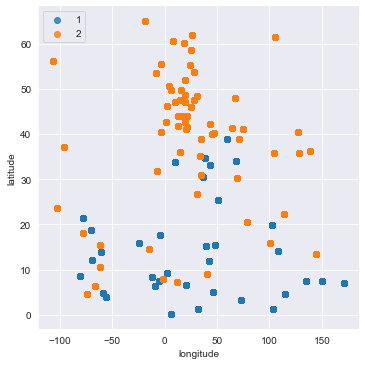

In [16]:
# subset for northern hemisphere
both_north = df_events_d[df_events_d["latitude"] >= 0]

# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="longitude", y="latitude", data=both_north, fit_reg=False, hue='summer_winter', legend=False)
plt.legend(loc='upper left')
plt.show()

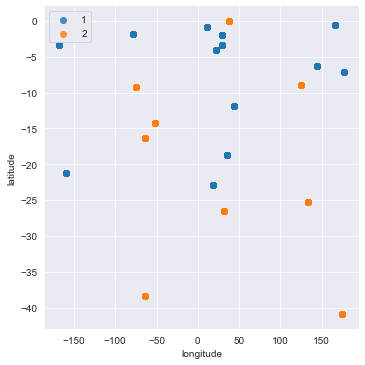

In [17]:
# subset for northern hemisphere
both_south = df_events_d[df_events_d["latitude"] < 0]

# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="longitude", y="latitude", data=both_south, fit_reg=False, hue='summer_winter', legend=False)
plt.legend(loc='upper left')
plt.show()

In [21]:
# subset for northern hemisphere
summer_only = df_events_d[df_events_d["summer_winter"] == 1]
summer_only2 = summer_only[['latitude','longitude','Name']]

# Customize the size of the figure
figure_layout = {
    'width': '800px',
    'height': '400px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

summer_only3 = summer_only2.groupby(['latitude','longitude']).agg({'Name': 'nunique'})
summer_only3

,,Name
latitude,longitude,
-22.957640,18.490410,40
-21.236736,-159.777671,30
-18.665695,35.529562,52
-11.875001,43.872219,15
-7.109535,177.649330,6
-6.314993,143.955550,61
-4.038333,21.758664,69
-3.373056,29.918886,25
-3.370417,-168.734039,9


In [19]:
# Assign the marker layer to a variable
markers = gmaps.marker_layer(summer_only2)
# Add the layer to the map
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(border='1px solid black', height='400px', margin='0 auto 0 auto', padding='1px', wi…